SOQPSK-TG
====
Last update: 21 July 2018  
Some python code to explore SOQPSK as defined in chapter 2 of IRIG 106-17, page 16, paragraph 2.3.3.2. This notebook walks through the describtion of SOQPSK as defined in IRIG 106-17 and implements differential coding, pre-coder and impulse shaping filter.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Input test data
Generate some random binary data.  For the purposes of this scrip, it doesn't matter what the data is.  A random distribition of ones and zeros would work just fine.  Only run one of the cells below to generate a test vector.

In [2]:
# test vector #1, create some random data of length 2*n
n = 50  # number of 1 and zeros, total number of bits is 2*n
data = np.hstack((np.ones(n,dtype=int), np.zeros(n,dtype=int)))
np.random.shuffle(data)

In [43]:
# test vector #2, 100 random bits
data = np.array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0])

In [0]:
# test vector #3, data from chapter 2, B.10
data = np.array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0])

# Differential encoder
Practical carrier recovery techniques like Costas loops and squaring loops exhibit a troublesome M-fold carrier phase ambiguity. Differential encoding cover comes the phase ambiguity.  For phase modulations, source data is coded such that phase differences rather than absolute phase coordinates become the information-bearing attribute of the signal.  Differential encoding incurs a bit error penalty because received code symbols influence more than one decoded bit.  
  
Equations B-3 and B-4 do not impose any implementation constraints on initial values when encoding or decoding starts.  

In [3]:
# differential encoder, from paragraph 2.3.3.1.1 Differential Encoding, also B-2
numbits = len(data)
# create arrays for I and Q channels
I = np.zeros(int(numbits/2),dtype=int)
Q = np.zeros(int(numbits/2),dtype=int)

# n starts at bit postion 1
for n in range(1,int(numbits/2)):
    I[n] = np.logical_xor(data[2*n],not Q[n-1])  # equation 2-1
    Q[n] = np.logical_xor(data[2*n+1],I[n])  # equation 2-2

# map I and Q values from 1 and 0 to 1 and -1 to follow notation in IRIG 106
I[I == 0] = -1
Q[Q == 0] = -1

In [4]:
data

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0])

In [5]:
I

array([-1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1,
        1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
       -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1])

In [6]:
Q

array([-1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,
       -1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1])

In [7]:
# test differental encode by recovering the orginal data, follows equation B-10
#interleave I and Q
# merge I and Q together, I can either be odd or even
B = np.ones(len(data),dtype=int)
for k in range(len(I)):
    B[2*k] = I[k]  # test with I being even, Q being odd
    B[2*k+1] = Q[k]
B[B == -1] = 0

b = np.zeros(len(data),dtype=int)
for k in range(2,len(b)):
    b[k] = np.logical_xor(np.logical_xor(b[k-1],B[k]),not B[k-2]) # equation B-10

In [8]:
b == data

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

B.7. Recursive Processing and Code Memory  
Most systems reconstruct the original bit rate clock and {b} by merging {e’} and {o’}.  For a variety of reasons, designers might be tempted to multiplex {I’} and {Q’} into a bit rate code symbol sequence {Bn} prior to decoding; however, the same considerations that foster desire for post-multiplex decoding are likely to be accompanied by loss of transmitted code symbol order, i.e., loss of knowledge whether a given code symbol came from I or Q.

# Pre-coder
Given the symbol sequences Ik and Qk, and the proviso that a normalized impulse sign of +1 will increase frequency, the pre-coder will provide interoperability with the FQPSK signals defined herein if code symbols are mapped to frequency impulses in accordance with Table 2-5 where ∆Φ is the phase change.  
  
At the beginning of each bit interval, impulses from the bit-to-impulse alphabet mapper direct the impulse filter/frequency modulator to advance the carrier phase by 90°, retard it by or 90°, or leave the phase unchanged. This is accomplished with a ternary alphabet of frequency impulses having normalized amplitudes of {−1,0,1}.  

In [9]:
# SOQPSK Pre-Coding Table for IRIG-106-17 Compatibility, implements Table 2-5
a = np.zeros(int(numbits/2),dtype=int)  # when done should all be set to -1, 0 or +1

for k in range(2,int(numbits/2-1),2):
    # Map α[K] from I[K]
    if I[k] == -1 and I[k-2] == -1:
        pass #a[k] = 0, array initialized to zeros
    elif I[k] == 1 and I[k-2] == 1:
        pass #a[k] = 0
    elif I[k] == -1 and Q[k-1] == -1 and I[k-2] == 1:
        a[k] = -1
    elif I[k] == -1 and Q[k-1] == 1 and I[k-2] == 1:
        a[k] = 1
    elif I[k] == 1 and Q[k-1] == -1 and I[k-2] == -1:
        a[k] = 1
    elif I[k] == 1 and Q[k-1] == 1 and I[k-2] == -1:
        a[k] = -1
    else:
        print('error for a[k]')

    # Map α[K+1] from Q[K+1]
    if Q[k+1] == -1 and Q[k-1] == -1:
        pass #a[k+1] = 0
    elif Q[k+1] == 1 and Q[k-1] == 1:
        pass #a[k+1] = 0
    elif Q[k+1] == -1 and I[k] == -1 and Q[k-1] == 1:
        a[k+1] = 1
    elif Q[k+1] == -1 and I[k] == 1 and Q[k-1] == 1:
        a[k+1] = -1
    elif Q[k+1] == 1  and I[k] == -1 and Q[k-1] == -1:
        a[k+1] = -1
    elif Q[k+1] == 1  and I[k] == 1 and Q[k-1] == -1:
        a[k+1] = 1
    else:
        print('error for a[k+1]')

print('for loop ran to k = {:d}'.format(k))

for loop ran to k = 48


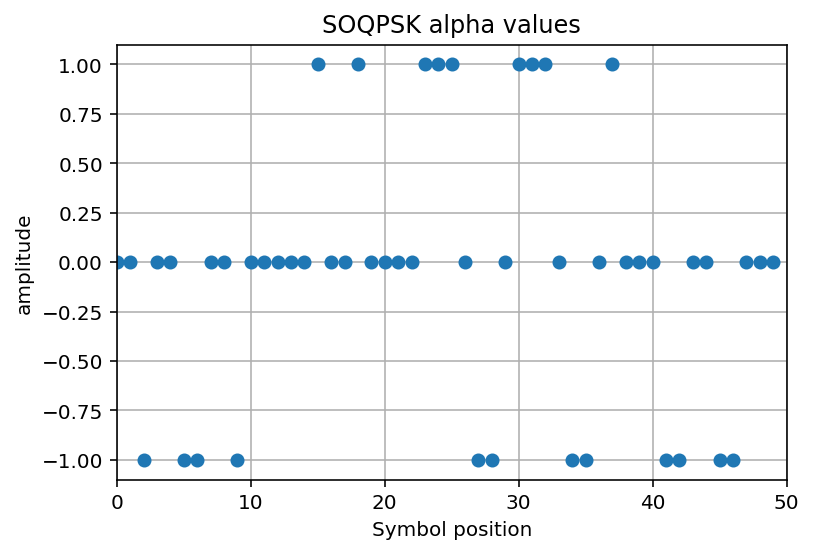

In [10]:
plt.plot(a,'o')

plt.xlim(0,50)
#plt.xticks(np.arange(0, 21, step=1))

plt.grid()
plt.title('SOQPSK alpha values')
plt.ylabel('amplitude')
plt.xlabel('Symbol position')
plt.show()

# Impulse shaping filter
From RCC Standard 106-17, paragraph 2.3.3.2  
  
The SOQPSK waveform family is uniquely defined in terms of impulse excitation of a frequency impulse shaping filter function $g(t)$:  
  
$g(t)=n(t)w(t)$  
  
$n(t)=\biggl[\frac{Acos(\pi\theta_1(t))}{1-4\theta_1^2(t)}\biggr]\biggl[\frac{sin\theta_2(t)}{\theta_2(t)}\biggr]$  
$\theta_1(t)=\frac{\rho Bt}{T_s}$  
$\theta_2(t)=\frac{\pi Bt}{T_s}$  
  
  
$w(t) =
\begin{cases}
1,  &  |\frac{t}{T_s}| \leq T_1 \\[2ex]
\frac{1}{2}\biggl[1+cos\frac{\pi (|\frac{t}{T_s}|-T_1)}{T_2}\biggr], & T_1\lt|\frac{t}{T_s}|\leq T_1+T_2 \\[2ex]
0, & |\frac{t}{T_s}|\gt T_1+T_2
\end{cases}$
  
where:  
$\rho = 0.7$  
$B = 1.25$  
$T_1 = 1.5$  
$T_2 = 0.5$  
  
where:
Ts is the symbol period.  
t = time samples  
  
The amplitude scale factor A is chosen such that:  
  
$\displaystyle \int_{-(T_1+T_2)T_s}^{(T_1+T_2)T_s} g(t) dt = \frac{\pi}{2}$  

In [11]:
# SOQPSK-TG Parameters
rho = 0.7
B = 1.25
T1 = 1.5
T2 = 0.5
A = 1.9550980649982261 # a value calculated below and copied here

In [12]:
# implements equations 2-5, 2-6 and 2-7
def theta1(t):
    return rho*B*t/T_s

def theta2(t):
        return np.pi*B*t/T_s

def w(t):
    if np.abs(t/T_s) <= T1:
        x = 1
    if T1 < np.abs(t/T_s) and np.abs(t/T_s) <= T1+T2:
        x = (1+np.cos(np.pi*(np.abs(t/T_s)-T1)/T2))/2
    if np.abs(t/T_s) > T1+T2:
        x = 0
    return x

def n(t):
    return (A*np.cos(np.pi*theta1(t))/(1-4*theta1(t)**2))*(np.sin(theta2(t))/theta2(t))

def g(t):
    return n(t)*w(t)

In [13]:
ts = 0.01  # time step, 0.01 is 100 time steps per symbol period
T_s = 1 # the symbol period

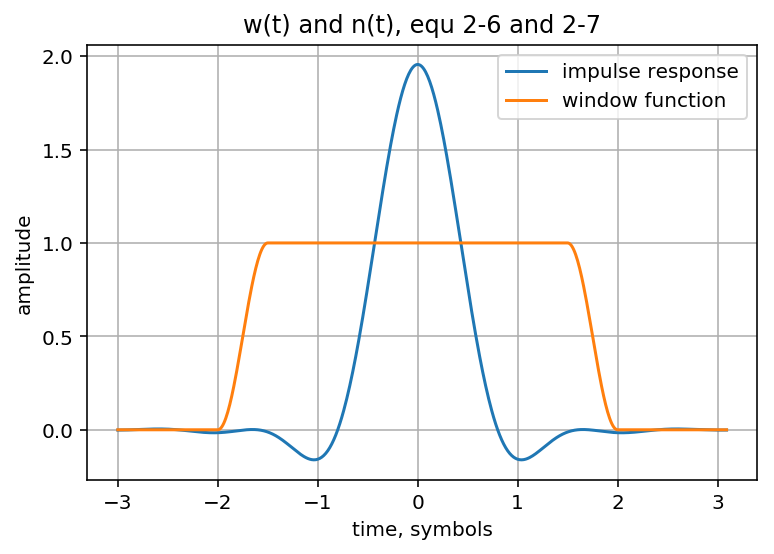

In [14]:
# plot the impulse response and the window function
t = np.arange(-3,3.1,ts)
w1 = np.ones(len(t))
for i in range(len(t)):
    w1[i] = w(t[i])

plt.plot(t,n(t),label='impulse response')
plt.plot(t,w1,label='window function')

plt.grid()
plt.legend()
plt.title('w(t) and n(t), equ 2-6 and 2-7')
plt.ylabel('amplitude')
plt.xlabel('time, symbols')

plt.show()

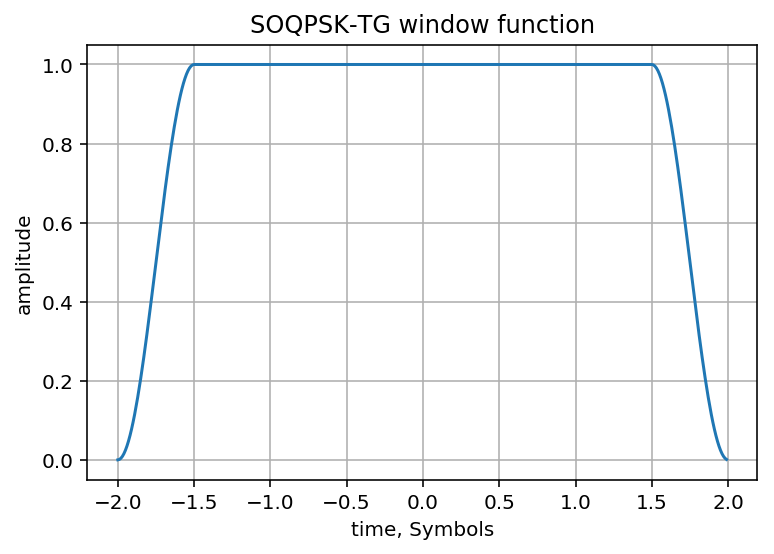

In [15]:
# The window function is a step wise discrete function and is evaluated with a for loop.
t = np.arange(-2*T_s,2*T_s,ts)
w1 = np.ones(len(t))
for i in range(len(t)):
    w1[i] = w(t[i])

plt.plot(t,w1)
plt.grid()
plt.title('SOQPSK-TG window function')
plt.ylabel('amplitude')
plt.xlabel('time, Symbols')
plt.show()

In [16]:
len(w1)

400

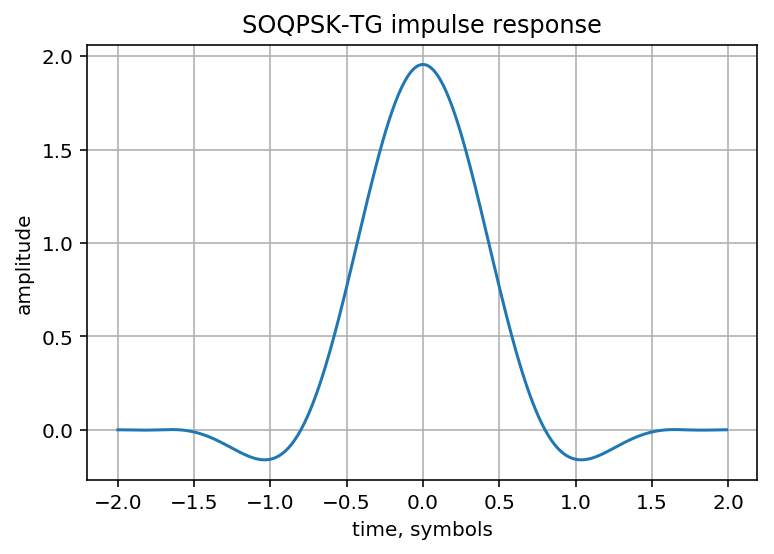

In [17]:
t = np.arange(-2*T_s,2*T_s,ts)
soqpsk_tg_ip = w1*n(t)  # SOQPSK-TG impulse response
plt.plot(t,soqpsk_tg_ip)

plt.grid()
plt.title('SOQPSK-TG impulse response')
plt.ylabel('amplitude')
plt.xlabel('time, symbols')
plt.show()

In [18]:
# according to equation 2-8, the scale factor A is needed to make the integral of n(t)=pi/2.
np.trapz(soqpsk_tg_ip,dx=ts)

1.5707963267948966

In [19]:
(np.pi/2) == np.trapz(soqpsk_tg_ip,dx=ts)

True

In [20]:
(np.pi/2) - np.trapz(soqpsk_tg_ip,dx=ts)

0.0

In [21]:
len(soqpsk_tg_ip)

400

In [22]:
# make an array to hold output of impulse response filter over the number of bits in the input data array
# array a (called alpha in chapter 2) is the series of impulses.
#filter_out = np.zeros(int(len(a)/ts)+len(soqpsk_tg_ip)*4)
filter_out = np.zeros(len(a)*len(soqpsk_tg_ip)+len(soqpsk_tg_ip))

for i in range(2,len(a)):
    # add impulse response every symbol interval
    sym_mid_position = i*int(len(soqpsk_tg_ip)/4) # calculate symbol mid position location based on step size
    for j in range(len(soqpsk_tg_ip)):
        if a[i] != 0:
            filter_out[sym_mid_position-int(len(soqpsk_tg_ip)/2)+j] += soqpsk_tg_ip[j]*a[i]

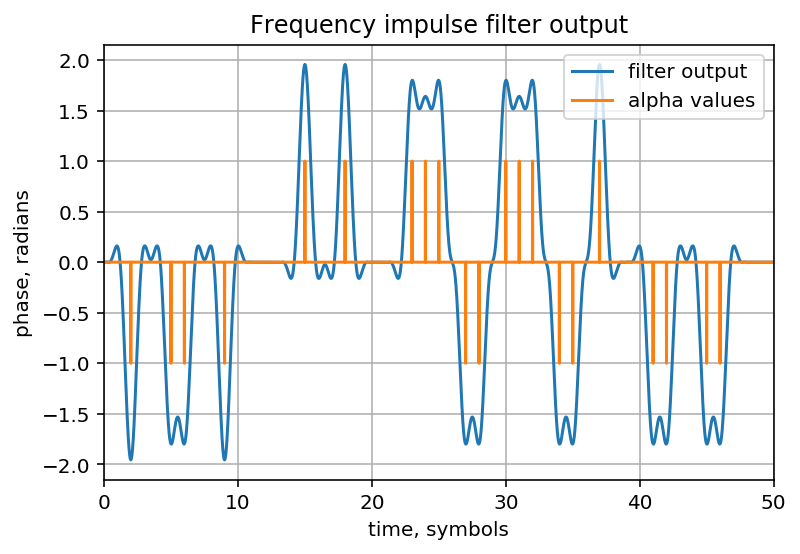

In [23]:
# plot alpha values on filter_out scale to make sure alpha lines up with impulse pulses
test_a = np.zeros(len(filter_out))
for i in range(len(a)):
    test_a[i*int(len(soqpsk_tg_ip)/4)] = a[i]

# filter out values
x = np.arange(0,len(filter_out))
plt.plot(x*ts,filter_out,label='filter output')
plt.plot(x*ts,test_a,label='alpha values')

plt.grid()
plt.legend()
plt.title('Frequency impulse filter output')
plt.ylabel('phase, radians')
plt.xlabel('time, symbols')
plt.xlim(0,len(a))
plt.xticks(np.arange(0, len(a)+1, step=10))

plt.show()

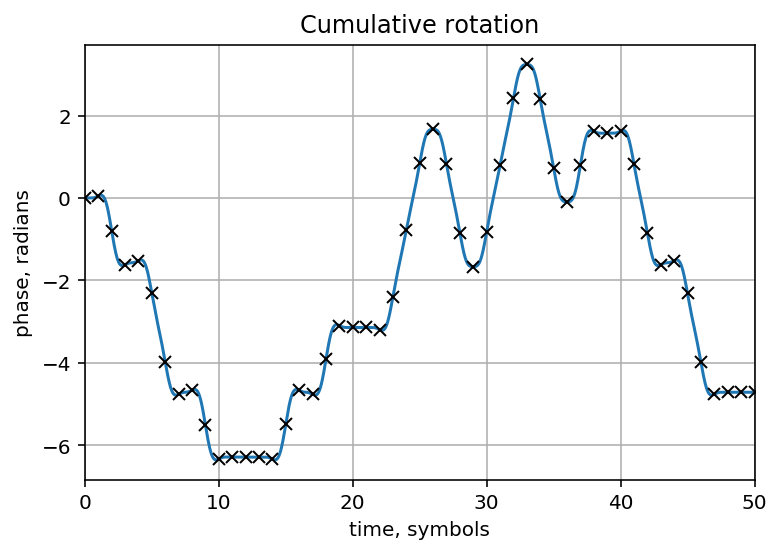

In [24]:
# cumulative sum of the filter out values scaled to radians
cum_phase = np.cumsum(filter_out/(len(soqpsk_tg_ip)/4))
plt.plot(x*ts,cum_phase)

# plot center of sysmbol locations
for i in range(0,len(x),int(len(soqpsk_tg_ip)/4)):
    plt.plot(x[i]*ts,cum_phase[i],'xk')

plt.xlim(0,len(a))
plt.xticks(np.arange(0, len(a)+1, step=10))
plt.grid()
plt.title('Cumulative rotation')
plt.ylabel('phase, radians')
plt.xlabel('time, symbols')
plt.show()

In [25]:
# get list of phase positions at every symbol location
cum_phase = cum_phase + np.pi/4 # rotate by 45 degrees
phase_list = np.ones(len(a))
for i in range(len(a)):
    phase_list[i] = cum_phase[i*int(len(soqpsk_tg_ip)/4)]*180/np.pi

np.set_printoptions(precision=1,suppress=True)
print('Phase rotation list, degrees = ',phase_list)

Phase rotation list, degrees =  [  45.    47.8   -0.6  -47.7  -42.2  -87.7 -183.3 -227.7 -222.2 -270.6
 -317.7 -315.  -315.  -315.  -317.8 -269.4 -222.3 -227.8 -179.4 -132.3
 -135.  -135.  -137.8  -92.3    0.5   93.3  140.5   92.3   -3.3  -50.5
   -2.3   90.5  183.3  230.5  182.3   86.7   39.5   90.6  137.7  135.
  137.8   92.3   -3.3  -47.7  -42.2  -87.7 -183.3 -227.7 -225.  -225. ]


## Decompose to I/Q
Decompose phase to I/Q.  Think about labeling decomposed symbols as even and odd.  <<<<----   

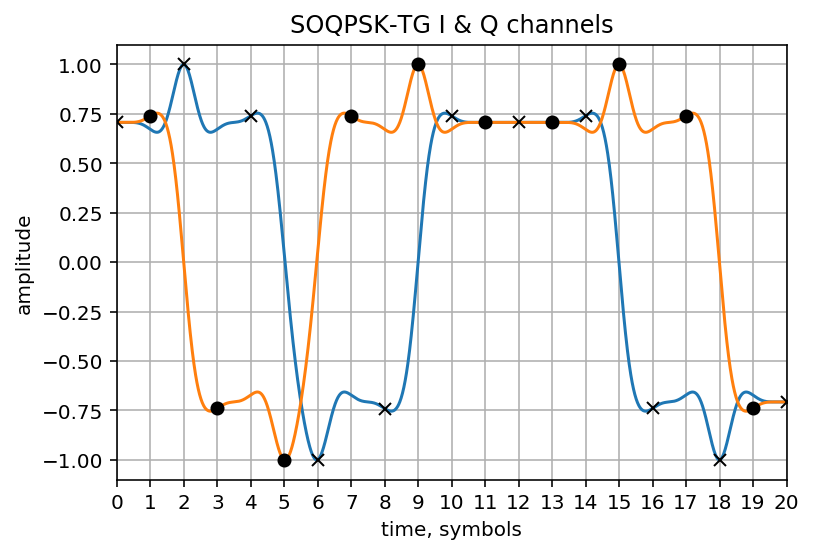

In [26]:
# resolve cumulative phase to I and Q
Im = np.sin(cum_phase)
Qm = np.cos(cum_phase)

x = np.arange(0,len(filter_out))
plt.plot(x*ts,Qm,'-')
plt.plot(x*ts,Im,'-')

# plot center of symbol locations, 1st symbol is chosen as Q  <<--- maybe should lable as even and odd
for i in range(0,len(x),int(len(soqpsk_tg_ip)/2)):  # need to delay for proper location
    plt.plot(x[i]*ts,Qm[i],'xk')

for i in range(int(1/ts),len(x),int(len(soqpsk_tg_ip)/2)):
    plt.plot(x[i]*ts,Im[i],'ok')

plt.grid()
plt.title('SOQPSK-TG I & Q channels')
plt.ylabel('amplitude')
plt.xlabel('time, symbols')
plt.xlim(0,20)
plt.xticks(np.arange(0, 21, step=1))
plt.show()

Need to add some logic so symbols are delayed correctly.  
this data sequence has timming off:  
array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0])  
  
  
This data sequence has correct timing:  
array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0])  


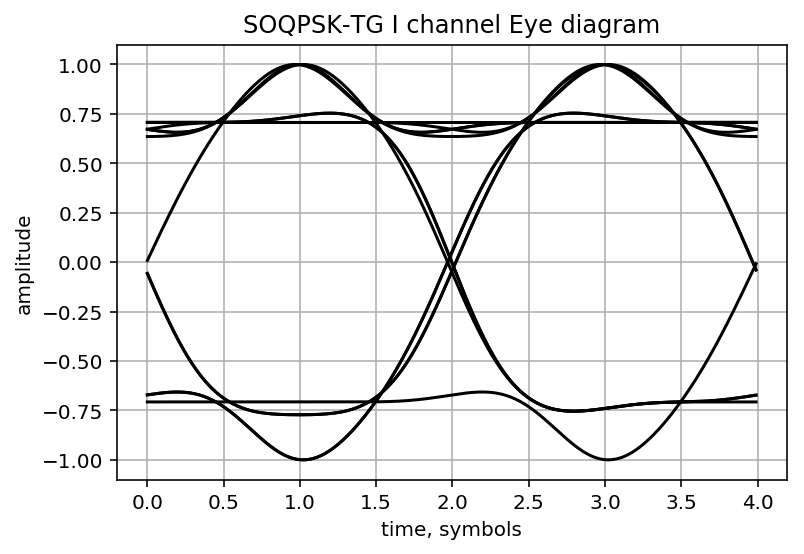

In [27]:
# plot eye diagram
m = int(len(soqpsk_tg_ip)/1) # number of samples in each trace
n = int(len(filter_out)/m) # number of traces to display
Eye = np.ones(m)
x = np.arange(m)
for i in range(n):
    for j in range(m):
        Eye[j] = Im[j+i*m]
    plt.plot(x*ts,Eye,'-k')

plt.grid()
plt.title('SOQPSK-TG I channel Eye diagram')
plt.ylabel('amplitude')
plt.xlabel('time, symbols')
plt.show()

Eye diagram doesn't look exactly the same as in literature.  This still needs some work, but probably not essential to the task.  

# Constellation

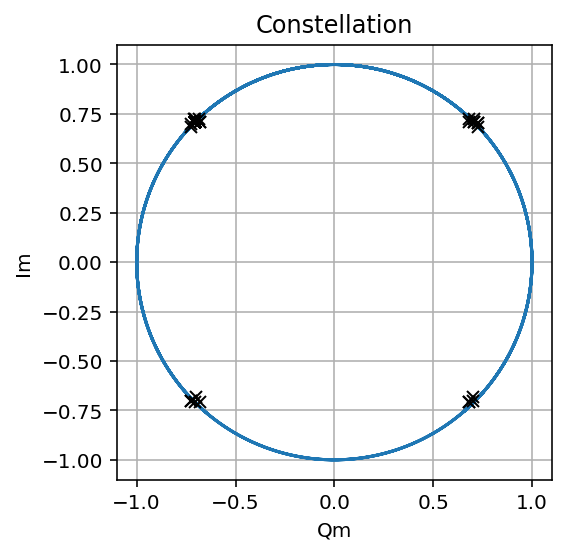

In [28]:
# resolve cumutilive phase to I and Q
Im = np.cos(cum_phase)
Qm = np.sin(cum_phase)

fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal', 'box')

x = np.arange(0,len(filter_out))
plt.plot(Im,Qm,'-')

# plot center of sysmbol locations
for i in range(0,len(x),int(len(soqpsk_tg_ip)/2)):
    plt.plot(Im[i+int(1/ts/2)],Qm[i-int(1/ts/2)],'xk')

plt.grid()
plt.title('Constellation')
plt.ylabel('Im')
plt.xlabel('Qm')

plt.show()

# Frequency modulate
Apply filter_out to frequency modulator.  
Need to define timescale in terms of seconds.  
there are 100 samples per symbol.  Symbol rate can be any value, Rs.

In [95]:
Rs = 7    # symbol rate, for now make 7 symbols per second, just to pick an odd value
sr =  Rs/ts # sample rate
print('symbol rate = {:.1f} Hz'.format(Rs))
print('sample rate = {:.1f} Hz'.format(sr))
print('time step = {:.3f}'.format(ts))
print('samples per symbol = {:.1f}'.format(T_s/ts))

end_time = len(filter_out)*ts/Rs  # seconds
t = np.linspace(0,end_time,len(filter_out),endpoint = True)
print('end time = {:.1f} sec'.format(end_time))

x = np.arange(0,len(filter_out),1)  # 
xmtr = np.sin(x+filter_out)  # should t be here???
#xmtr = np.sin(2*np.pi*t + filter_out)
#xmtr = np.sin(t + filter_out)

print('xmtr freq = {:.2f} Hz'.format(len(filter_out)/2/np.pi/end_time))

symbol rate = 7.0 Hz
sample rate = 700.0 Hz
time step = 0.010
samples per symbol = 100.0
end time = 29.1 sec
xmtr freq = 111.41 Hz


In [84]:
len(xmtr)/sr

29.142857142857142

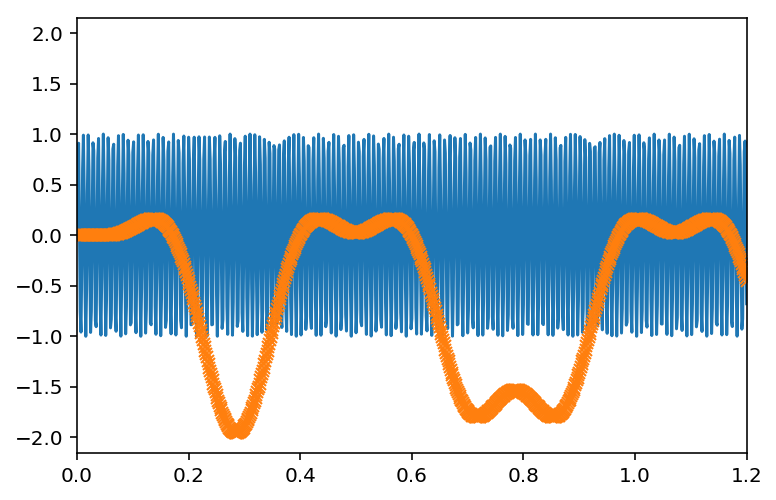

In [89]:
p = 1000
plt.plot(t,xmtr,'-')
plt.plot(t,filter_out,'x')
#plt.plot(t[0:p],xmtr[0:p],'.-')
#plt.plot(t[0:p],filter_out[0:p],'x')
plt.xlim(0, 1.2)
plt.show()

# SOQPSK-TG spectrum
fft length 8192  
T_s = 1  
ts = 0.1  
fc = 10  
fft_length = 1024  
  
need to calculate the spectrum units  


In [101]:
# try a peak hold
p = 2048
num_2_avg = int(len(t)/p)
xmtr_spec = np.zeros((num_2_avg,p),dtype=complex)
spec_peak_hold = np.zeros(p,dtype=complex)

for i in range(num_2_avg):
    #xmtr = np.sin(t[i*p:i*p+p]+filter_out[i*p:i*p+p])
    xmtr_spec[i,:] = np.fft.fft(np.hamming(p)*xmtr[i*p:i*p+p])
    for j in range(p):
        if np.abs(xmtr_spec[i,j]) > np.abs(spec_peak_hold[j]):
            spec_peak_hold[j] = xmtr_spec[i,j]


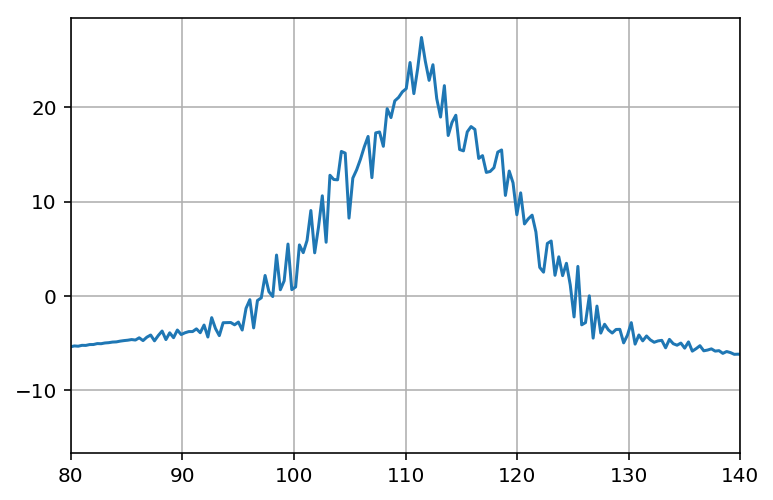

In [102]:
f = np.arange(0,sr,sr/p)
plt.plot(f,10*np.log10(np.abs(spec_peak_hold)))

plt.grid()
#plt.title('SOQPSK-TG I & Q channels')
#plt.ylabel('amplitude')
#plt.xlabel('time, symbols')
#plt.xlim(0,p/4)
plt.xlim(80,140)
#plt.xticks(np.arange(0, p/2, step=100))
plt.show()

# Recover data

# to do list
Need to have eye diagram looking correct.  
Use results to explore phase and groupe delay impacts to BER.  

# Thermal noise

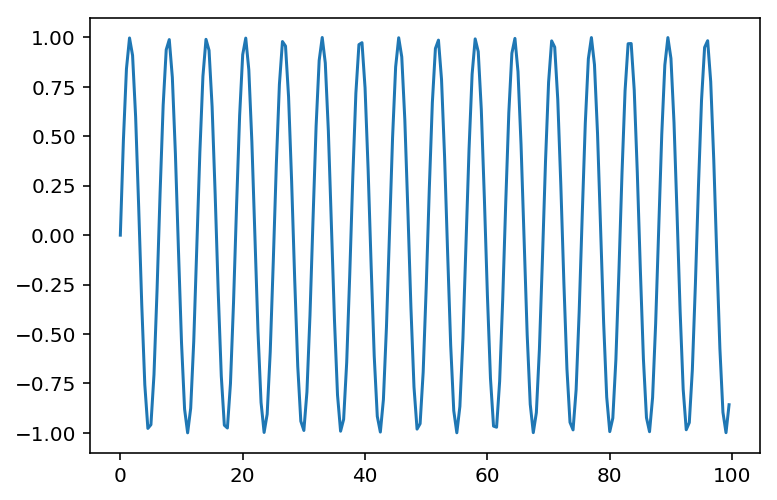

In [84]:
p = 200
plt.plot(t[0:p],np.sin(t[0:p]+filter_out[0:p]))
#plt.xlim(0, p)
plt.show()

In [0]:
# plot eye diagram
m = 200 # number of samples in each trace
n = 25  # number of traces to display
Eye = np.ones(m)
x = np.arange(m)
for i in range(n):
    for j in range(m):
        Eye[j] = Qm[j+i*m]
    plt.plot(x,Eye,'-k')
plt.show()

### some additional stuff
need to create a plot like Figure A-22. Measured SOQPSK-TG Phase Trajectory

In [0]:
k = 0
#plt.plot(x)
#plt.plot(y)
plt.plot(Im,Qm,'x')
#plt.xlim(k*100,k*100+100)
plt.show()

In [0]:
I

### FFT test code

samples per cycle = 10.0
step size = 0.100
length of x = 3000
cycles per sec = 0.0 Hz
end time = 300.0 sec
frequency = 1.0 Hz
length of t = 3000


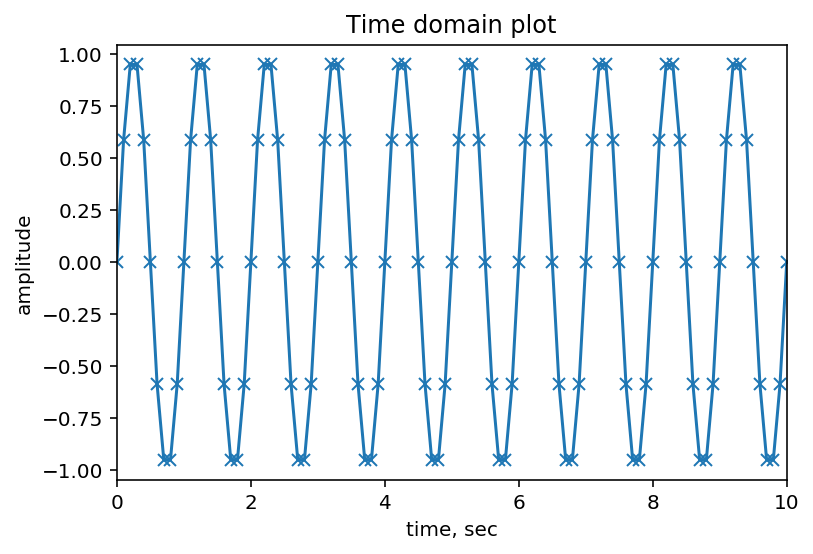

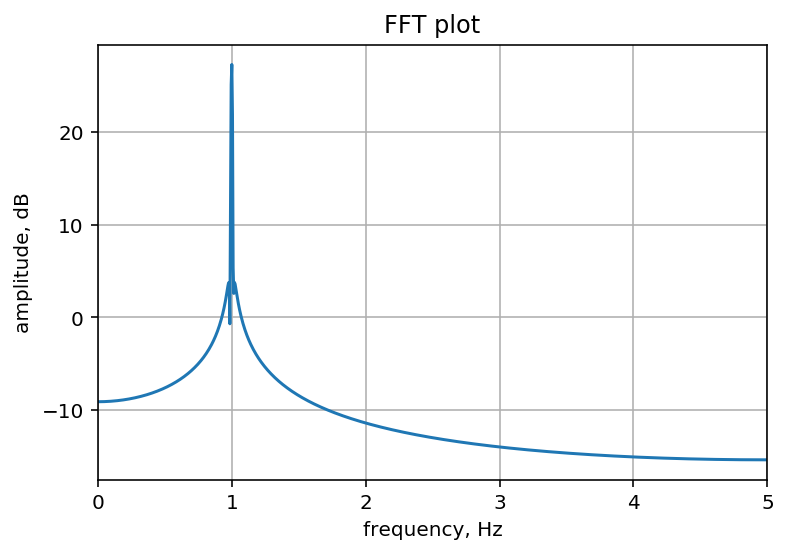

In [20]:
fft_len = 2048

nc = 300  # number of cycles to plot

spc = 10 # samples per cycle
print('samples per cycle = {:.1f}'.format(spc))
ss = 1/spc  # step size
print('step size = {:.3f}'.format(ss))

x = np.arange(0,2*np.pi*nc,2*np.pi*ss)  # arange([start, ]stop, [step, ]dtype=None)
print('length of x = {:d}'.format(len(x)))

cps = spc/nc  # cycles per second, Hz
print('cycles per sec = {:.1f} Hz'.format(cps))

# time runs 0 to X seconds
end_time = 300  # seconds
t = np.linspace(0,end_time,len(x),endpoint = True)
print('end time = {:.1f} sec'.format(end_time))
print('frequency = {:.1f} Hz'.format(nc/end_time))
print('length of t = {:d}'.format(len(t)))

plt.title('Time domain plot')
plt.ylabel('amplitude')
plt.xlabel('time, sec')
plt.plot(t,np.sin(x),'-x')
plt.xlim(0,10)
plt.show()

# calculate the FFT
xmtr = np.sin(x[0:fft_len])
xmtr_spec = np.fft.fft(np.hamming(fft_len)*xmtr)

f = np.arange(0,spc,spc/fft_len)
plt.plot(f,10*np.log10(np.abs(xmtr_spec)))

plt.grid()
plt.title('FFT plot')
plt.ylabel('amplitude, dB')
plt.xlabel('frequency, Hz')
plt.xticks(np.arange(0, spc, step=1))
plt.xlim(0,spc/2)
plt.show()

In [72]:
len(f)

20480

In [7]:
p/2

1024.0

In [19]:
spc

10

In [14]:
spc/p

0.0048828125

In [39]:
205*(spc/p)

1.0009765625

samples per cycle = 10.0
step size = 0.100
length of x = 3000
cycles per sec = 0.0 Hz
end time = 300.0 sec
frequency = 1.0 Hz
length of t = 3000


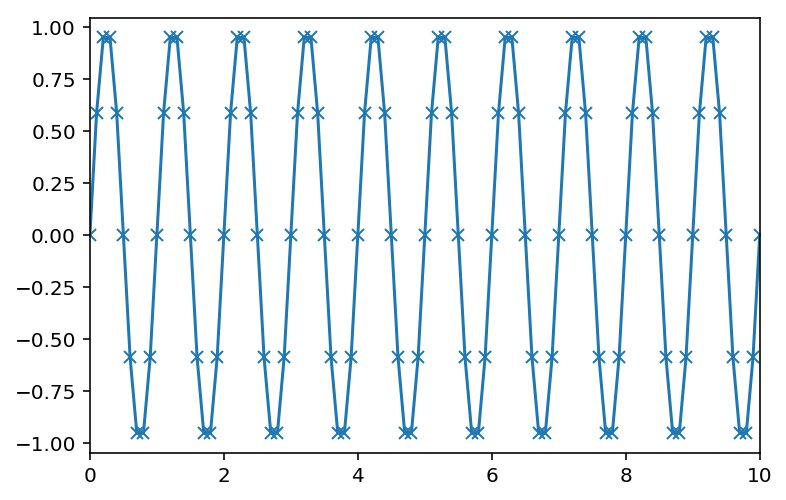

In [50]:
p = 2048
nc = 300  # number of cycles to plot

spc = 10 # samples per cycle
print('samples per cycle = {:.1f}'.format(spc))
ss = 1/spc  # step size
print('step size = {:.3f}'.format(ss))

x = np.arange(0,2*np.pi*nc,2*np.pi*ss)  # arange([start, ]stop, [step, ]dtype=None)
print('length of x = {:d}'.format(len(x)))

cps = spc/nc  # cycles per second, Hz
print('cycles per sec = {:.1f} Hz'.format(cps))

# time runs 0 to 10 seconds
end_time =300  # seconds
t = np.linspace(0,end_time,len(x),endpoint = True)
print('end time = {:.1f} sec'.format(end_time))
print('frequency = {:.1f} Hz'.format(nc/end_time))
print('length of t = {:d}'.format(len(t)))

plt.plot(t,np.sin(x),'-x')
plt.xlim(0,10)
plt.show()

In [4]:
len(t)

315

ref:  
http://www.mrcolson.com/2016/04/21/Simple-Python-FM-Synthesis.html  


In [0]:
# code to generate random 1 and 0 for data
n = 5
m = 5
a = np.hstack((np.ones(n,dtype=int), np.zeros(m,dtype=int)))
np.random.shuffle(a)
a

Coclac doesn’t seem to run anymore from NMCI anymore. 

Try plotting cum_phase in terms of degrees to see if phase rotation makes sense. 

How to get I and Q from cum_phase rotation? Sin and cos don’t seem to work.  Maybe the impulse is not pi/2.

Need to step through and follow bits to symbols to phase

Maybe don’t need both diff encoding and table 2-5 to be applied.

Check table 2-5 code, try running map alpha[k] and alpha[k-1] separately to see if all the alphas get set correctly. 

Need to check on equation 2-8 to make sure the area of the pulse is pi/2.  This will move the phase by pi/2 for each impulse.

Need to make a test data test vector

Data = np.array([ copy some data here and save])  walk through the diff and Table 2-8 code by hand, put results in a spreadsheet.